# TOC 
 - [Imports](#imports)
 - [School Profile Information](#sp_info)
     - [Graduation Rate](#grad_rate)
     - [Numeric Feature Correlation to Target](#corr)
     - [Graduation Rate vs. Total Student Count](#total_students)
     - [Graduation Rate vs. Low Income Student Count](#low_income)
 - [Progress_Report](#pr_report)
     - School Type
         - Special Education
         - Options

<a id='imports'></a>

# Imports

In [134]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys, os
sys.path.append('../..')
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
full_path = os.getcwd()
home_folder = 'CPS_GradRate_Analysis'
root = full_path.split(home_folder)[0] + home_folder + '/'

sys.path.append(root)

In [136]:
sys.path.append(root+'src/preprocessing/')

In [137]:
from src.preprocessing.preprocessing_schoolid import load_prepped_school_year_profile, load_unprocessed_hs_df
from src.preprocessing.preprocessing_schoolid import merge_prepped_sy_profile_and_prog_rep
import src.preprocessing.preprocessing_schoolid as data_prep

In [138]:
sys.path.append('../..')

Information about CPS comes from two main files found in the Chicago Data Portal: School Profile Information csv's, School Progress Reports.  The key information from each , as it pertains to this analysis, is described below. The files are merged on School_ID

**School Profile Information File**
  - School_ID
  - Short_Name
  - Graduation_Rate_School
  - Student_Count_Total
  - Is_High_School
  - Dress_Code

**School Progress Report File**
  - School_ID
  - School_Type

    
  
 

<a id='sp_info'></a>

# School Profile Information

In [139]:
path_to_csv = '../../data/chicago_data_portal_csv_files/Chicago_Public_Schools_-_School_Profile_Information_SY1819.csv'

In [140]:
df = pd.read_csv(path_to_csv)
df.shape

(660, 95)

In [141]:
len(df['School_ID'].unique())

660

In [142]:
len(df['Short_Name'].unique())

660

In [143]:
hs_1819 = load_prepped_school_year_profile(path_to_csv)

In [144]:
original_hs_1819 = load_unprocessed_hs_df(path_to_csv)

<a id='grad_rates'></a>

## Graduation Rates

The target of the model is the graduation rate of schools in the Chicago Public School System. 

In [145]:
hs_1819.shape

(140, 22)

In [146]:
hs_1819.head()

,School_ID,Short_Name,Graduation_Rate_School,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Is_High_School,Dress_Code,Classroom_Languages,Transportation_El,perc_low_income
5,609750,SIMPSON HS,15.4,34,34,4,3,25,9,0,0,0,0,0,0,0,0,True,False,Spanish,Pink,1.000000
9,609754,CHICAGO MILITARY HS,85.7,295,211,27,18,188,100,4,0,0,0,0,3,0,0,True,True,Spanish,"Green, Red",0.715254
13,400051,NOBLE - NOBLE HS,89.4,660,552,93,65,74,565,8,5,4,0,0,3,0,1,True,True,Spanish,Blue,0.836364
15,609678,JONES HS,94.9,1910,713,103,21,228,564,748,273,6,0,0,80,11,0,True,False,"Chinese, French, Spanish","Blue, Brown, Pink, Red",0.373298
19,400085,ACERO - GARCIA HS,86.3,620,580,94,154,6,599,11,2,2,0,0,0,0,0,True,True,"Mandarin, Spanish",Orange,0.935484


(array([ 6.,  2.,  1.,  3.,  0.,  1.,  0.,  1.,  0.,  3.,  3.,  3., 10.,
         7., 14., 14., 17., 27., 15., 13.]),
 array([ 0.   ,  4.915,  9.83 , 14.745, 19.66 , 24.575, 29.49 , 34.405,
        39.32 , 44.235, 49.15 , 54.065, 58.98 , 63.895, 68.81 , 73.725,
        78.64 , 83.555, 88.47 , 93.385, 98.3  ]),
 <a list of 20 Patch objects>)

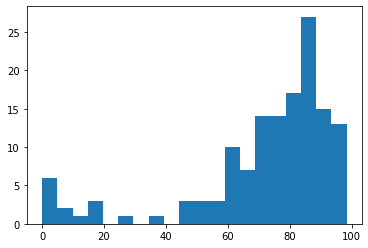

In [147]:
fig, ax = plt.subplots()

ax.hist(hs_1819['Graduation_Rate_School'], bins=20)

In [148]:
hs_1819['Graduation_Rate_School'].value_counts().sort_index()

0.0     2
1.1     1
1.8     1
2.9     1
4.3     1
       ..
96.5    1
96.8    1
98.0    1
98.2    1
98.3    1
Name: Graduation_Rate_School, Length: 127, dtype: int64

<a id='corr'></a>sort_index

# Numeric Feature Correlation to the Target

In [149]:
hs_1819.corr().loc['Student_Count_Total':,'Graduation_Rate_School'].abs().sort_values(ascending=False)

Student_Count_Total                        0.433580
Student_Count_Low_Income                   0.424840
Student_Count_Hispanic                     0.337115
perc_low_income                            0.287700
Student_Count_Multi                        0.266727
Student_Count_Native_American              0.260784
Student_Count_Asian                        0.246669
Student_Count_Black                        0.222714
Student_Count_White                        0.210062
Student_Count_Special_Ed                   0.206632
Student_Count_Hawaiian_Pacific_Islander    0.197297
Student_Count_Ethnicity_Not_Available      0.157648
Student_Count_English_Learners             0.151021
Student_Count_Asian_Pacific_Islander       0.125160
Dress_Code                                 0.094462
Student_Count_Other_Ethnicity                   NaN
Is_High_School                                  NaN
Name: Graduation_Rate_School, dtype: float64

While the racial data is interesting, I will not be including that in the model. 

<a id='total_students'></a>

# Total Students

> Does how more total students correlate with higher or lower graduation rates?

> There was one 2018-2019 school whose records had no student counts?

In [150]:
original_hs_1819['Student_Count_Total'].value_counts().sort_index()

0       3
14      1
21      1
34      1
61      1
       ..
2094    1
2205    1
2859    1
3294    1
4494    1
Name: Student_Count_Total, Length: 170, dtype: int64

In [151]:
# There is 1 school with 0 students. 

original_hs_1819[original_hs_1819['Student_Count_Total'] == 0]

,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,Summary,Administrator_Title,Administrator,Secondary_Contact_Title,Secondary_Contact,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Facebook,Twitter,Youtube,Pinterest,Attendance_Boundaries,Grades_Offered_All,Grades_Offered,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Statistics_Description,Demographic_Description,Dress_Code,PreK_School_Day,Kindergarten_School_Day,School_Hours,Freshman_Start_End_Time,After_School_Hours,Earliest_Drop_Off_Time,Classroom_Languages,Bilingual_Services,Refugee_Services,Title_1_Eligible,PreSchool_Inclusive,Preschool_Instructional,Significantly_Modified,Hard_Of_Hearing,Visual_Impairments,Transportation_Bus,Transportation_El,Transportation_Metra,School_Latitude,School_Longitude,Average_ACT_School,Mean_ACT,College_Enrollment_Rate_School,College_Enrollment_Rate_Mean,Graduation_Rate_School,Graduation_Rate_Mean,Overall_Rating,Rating_Status,Rating_Statement,Classification_Description,School_Year,Third_Contact_Title,Third_Contact_Name,Fourth_Contact_Title,Fourth_Contact_Name,Fifth_Contact_Title,Fifth_Contact_Name,Sixth_Contact_Title,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Network,Is_GoCPS_Participant,Is_GoCPS_PreK,Is_GoCPS_Elementary,Is_GoCPS_High_School,Open_For_Enrollment_Date,Closed_For_Enrollment_Date
14,610506,8080,49161,TEAM HS,TEAM Englewood Community Academy High School,HS,True,False,False,False,TEAM Englewood Community Academy is a 21st Cen...,Principal,Denise Michelle Gamble,Assistant Principal,Daena Adams,6201 S STEWART AVE,Chicago,Illinois,60621,7.735354e+09,7.735354e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.teamenglewood.org,https://www.facebook.com/pages/team-englewood-...,https://twitter.com/@TeamEnglewood,NaN,NaN,False,"10,11,12",10-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,There is not any Demographic information for t...,True,NaN,NaN,8:00 AM - 3:13 PM,NaN,NaN,7:30 AM,Spanish,False,False,True,NaN,NaN,NaN,NaN,NaN,"24, 63","Green, Red",NaN,41.781485,-87.633019,NaN,NaN,53.5,68.2,63.0,78.2,Level 3,INTENSIVE SUPPORT,"This school received a Level 3 rating, which i...",These schools limit their student populations ...,School Year 2018-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Network 16,True,False,False,True,07/01/2007 12:00:00 AM,NaN
16,610592,9692,0,ENGLEWOOD STEM HS,Englewood STEM High School,HS,True,False,False,False,The New Englewood STEM High School will open i...,Principal,NaN,NaN,NaN,6835 S NORMAL,Chicago,Illinois,60621,NaN,NaN,http://cps.edu/Schools/Pages/school.aspx?Schoo...,NaN,NaN,NaN,NaN,NaN,True,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,There is not any Demographic information for t...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.770251,-87.639061,NaN,NaN,NaN,59.8,NaN,77.5,NaN,NaN,NaN,Schools that have an attendance boundary. Gene...,School Year 2018-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,True,07/01/2019 12:00:00 AM,NaN
591,400142,9059,66626,YCCS - VIRTUAL,YCCS-Virtual HS,HS,True,False,False,False,NaN,Director,Ms.Mary Bradley,NaN,NaN,1900 W VAN BUREN ST,Chicago,Illinois,60612,3.124290e+09,3.122436e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://cps.edu/yccsvirtualhs,NaN,NaN,NaN,NaN,False,"9,10,11,12",9-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,There is not any Demographic information for t...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.876317,-87.674138,NaN,NaN,NaN,68.2,NaN,78.2,Inability to Rate,NOT APPLICABLE,This school did not have enough data to receiv...,"Schools 

> These have been removed in the final dataframe

In [152]:
len(hs_1819[hs_1819['Student_Count_Total'] == 0]) == 0

True

In [153]:
hs_1819['Student_Count_Total'].mean()

712.2214285714285

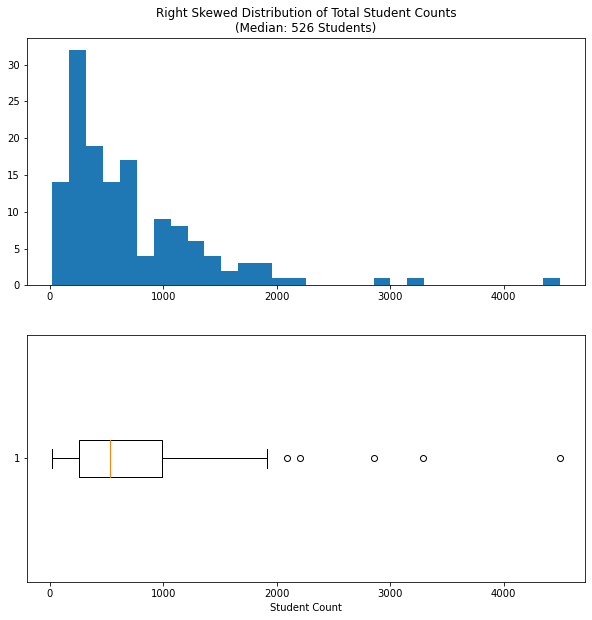

In [154]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].hist(hs_1819['Student_Count_Total'], bins=30)
ax[1].boxplot(hs_1819['Student_Count_Total'], vert=False)
ax[0].set_title(f"""Right Skewed Distribution of Total Student Counts
(Median: {round(hs_1819['Student_Count_Total'].median())} Students)""")
ax[1].set_xlabel('Student Count');

Text(0, 0.5, 'Graduation Rate')

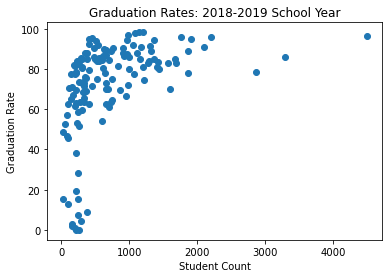

In [155]:
fig, ax = plt.subplots()
ax.scatter(hs_1819['Student_Count_Total'], hs_1819['Graduation_Rate_School'])
ax.set_title('Graduation Rates: 2018-2019 School Year')
ax.set_xlabel('Student Count')
ax.set_ylabel('Graduation Rate')

> There are a few schools with very low graduation rates which also have very low student counts. 

> There appears to be a positive correlation between total students and graduation rate, which is reinforced by the .4345 correlation below.

In [156]:
hs_1819[['Graduation_Rate_School', 'Student_Count_Total']].corr()

,Graduation_Rate_School,Student_Count_Total
Graduation_Rate_School,1.00000,0.43358
Student_Count_Total,0.43358,1.00000


> There also appears a curvature to the relationship, which may suggest the inclusion of a polynomial term in the model

In [157]:
hs_1819['student_count^2'] = hs_1819['Student_Count_Total']**2

In [158]:
hs_1819[['student_count^2', 'Graduation_Rate_School']].corr()

,student_count^2,Graduation_Rate_School
student_count^2,1.000000,0.258679
Graduation_Rate_School,0.258679,1.000000


> Basic correlation with squared term shows some correlation

<a id='low_income'></a>

# Does Number of low income students correlate with lower or higher graduation rates?

In [162]:
hs_1819['Student_Count_Low_Income'].sort_values()

24       18
5        34
179      50
61       70
357      75
       ... 
652    1523
520    1602
500    1752
634    1951
645    2536
Name: Student_Count_Low_Income, Length: 140, dtype: int64

In [160]:
dfhs_201819['Student_Count_Low_Income'].hist()

NameError: name 'dfhs_201819' is not defined

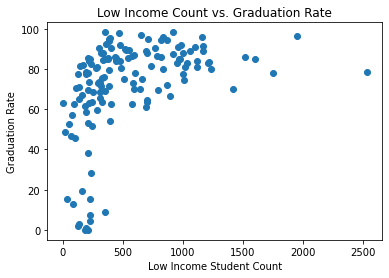

In [47]:
fig, ax = plt.subplots()
ax.scatter(dfhs_201819['Student_Count_Low_Income'], dfhs_201819['Graduation_Rate_School'])
ax.set_title('Low Income Count vs. Graduation Rate')
ax.set_xlabel('Low Income Student Count')
ax.set_ylabel('Graduation Rate');

In [48]:
dfhs_201819[['Student_Count_Low_Income','Graduation_Rate_School']].corr()

,Student_Count_Low_Income,Graduation_Rate_School
Student_Count_Low_Income,1.000000,0.425583
Graduation_Rate_School,0.425583,1.000000


There is a positive correlation between low income student count and graduation rate.  The scatter plot is very similar to the plot of Total students to low income students,.

In [49]:
dfhs_201819[['Student_Count_Low_Income','Student_Count_Total']].corr()

,Student_Count_Low_Income,Student_Count_Total
Student_Count_Low_Income,1.000000,0.898967
Student_Count_Total,0.898967,1.000000


As we see from the correlation above, there is a strong positive correlation between total student count and low income student count. 

Intuitively, the more students there are in a school, the more low income students there are.

## Percent Low Income

In [50]:
# Calculate % low income
dfhs_201819['perc_low_income'] = dfhs_201819['Student_Count_Low_Income']/dfhs_201819['Student_Count_Total']

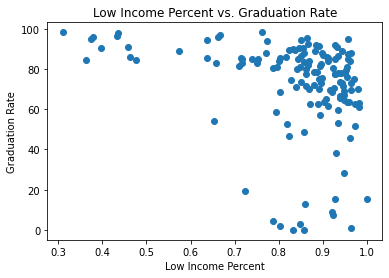

In [51]:
fig, ax = plt.subplots()
ax.scatter(dfhs_201819['perc_low_income'], dfhs_201819['Graduation_Rate_School'])
ax.set_title('Low Income Percent vs. Graduation Rate')
ax.set_xlabel('Low Income Percent')
ax.set_ylabel('Graduation Rate');

In [52]:
dfhs_201819[['perc_low_income','Graduation_Rate_School']].corr()

,perc_low_income,Graduation_Rate_School
perc_low_income,1.0000,-0.2877
Graduation_Rate_School,-0.2877,1.0000


As one would expect, schools that service less affluent communities show lower graduation rates. 
In other words, as the percentage of low income students goes down, the graduation rate of the school goes up.  

In [ ]:
# I will feature engineer percent low income within the preprocessing py file.

In [53]:
dfhs_201819[['perc_low_income','Student_Count_Total']].corr()

,perc_low_income,Student_Count_Total
perc_low_income,1.000000,-0.505144
Student_Count_Total,-0.505144,1.000000


There is a negative correlation between percentage low income students and total student count.  As the student population grows, there is a lower ratio of low income students to high income students.  In other words, schools with smaller populations tend to have larger relative proportions of low-income students.

> I'll begin investigating the difference between schools that fall into two bins

## Binning Low Income Populations

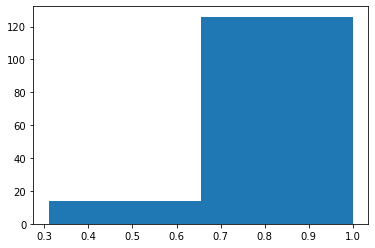

In [54]:
fig, ax = plt.subplots()

hist_2bin = ax.hist(dfhs_201819['perc_low_income'], bins=2)

In [55]:
hist_2bin[1][1]

0.6547826086956521

In [56]:
# Set high_low_inc value to a binary where 1 is > the separation of the binary histogram
dfhs_201819['high_low_inc'] = dfhs_201819['perc_low_income'].apply(lambda x: x > hist_2bin[1][1]).astype(int)

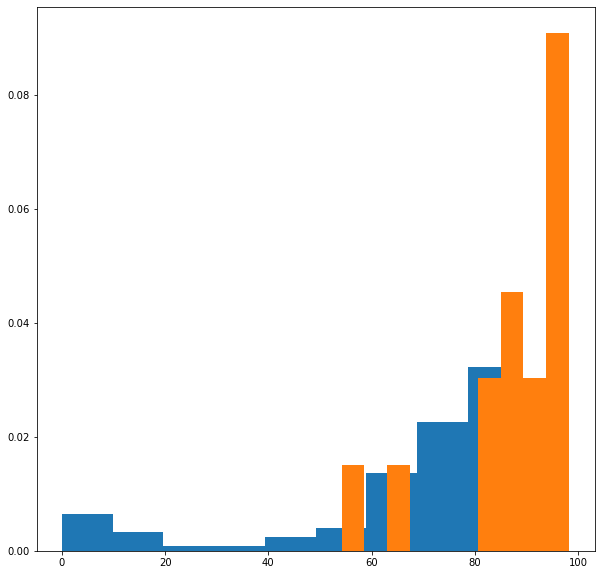

In [57]:
high_low_inc, ax = plt.subplots(figsize=(10,10))
high_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc']==1]['Graduation_Rate_School']
low_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc']==0]['Graduation_Rate_School']

ax.hist(high_low_inc_gradrates, density=True)
ax.hist(low_low_inc_gradrates, density=True);

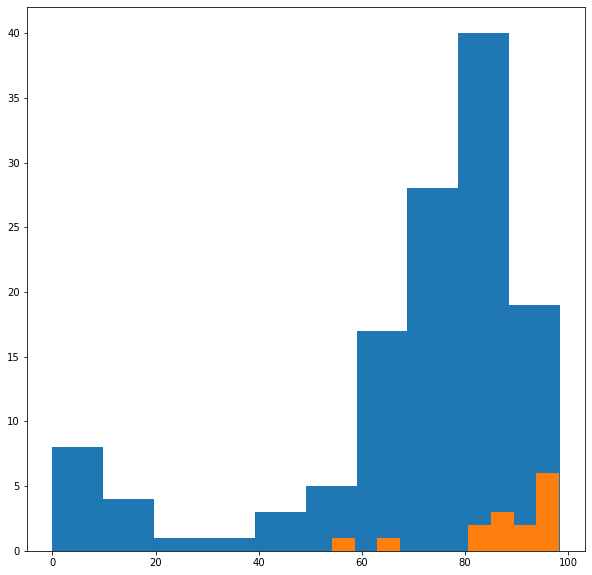

In [58]:
high_low_inc, ax = plt.subplots(figsize=(10,10))
high_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc']==1]['Graduation_Rate_School']
low_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc']==0]['Graduation_Rate_School']

ax.hist(high_low_inc_gradrates, density=False)
ax.hist(low_low_inc_gradrates, density=False);

> This grouping has too great a class imbalance to prove useful, most likely. 

I will try a grouping of high and low with the groupings split according to the histogram below.

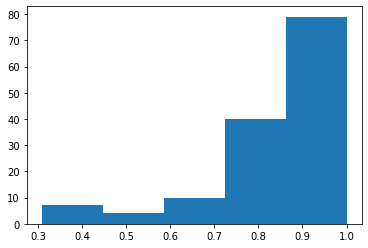

In [59]:
fig, ax = plt.subplots()

low_inc_5bins = ax.hist(dfhs_201819['perc_low_income'], bins=5)

In [60]:
low_inc_5bins[1][-2]

0.8619130434782609

In [61]:
dfhs_201819['high_low_inc_5bins'] = dfhs_201819['perc_low_income'].apply(lambda x: x > low_inc_5bins[1][-2]).astype(int)

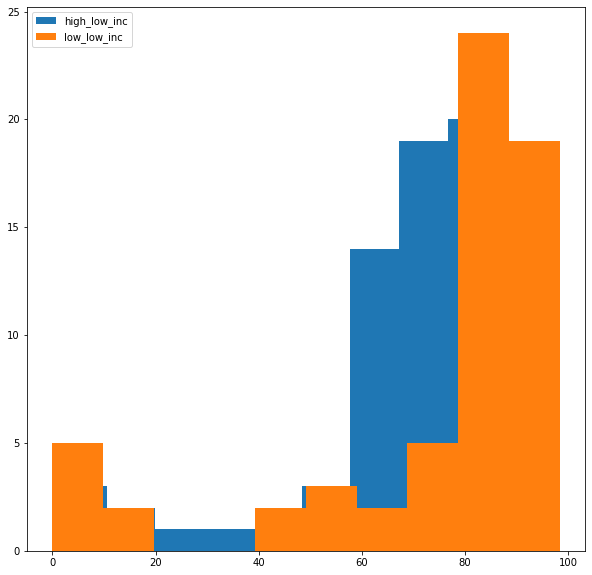

In [62]:
high_low_inc, ax = plt.subplots(figsize=(10,10))
high_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc_5bins']==1]['Graduation_Rate_School']
low_low_inc_gradrates = dfhs_201819[dfhs_201819['high_low_inc_5bins']==0]['Graduation_Rate_School']

ax.hist(high_low_inc_gradrates, density=False, label='high_low_inc')
ax.hist(low_low_inc_gradrates, density=False, label='low_low_inc')
ax.legend();

This looks a bit more interesting.  There is a better class balance and there does appear to be a difference in these distributions.

In [63]:
high_low_inc_gradrates.mean()

70.14810126582277

In [64]:
low_low_inc_gradrates.mean()

74.19354838709677

# Dress Code

Does a dress code improve graduation rate?

In [84]:
df_201819[df_201819['Dress_Code'] == True]['Graduation_Rate_School'].mean()

73.48817204301075

In [85]:
df_201819[df_201819['Dress_Code'] == False]['Graduation_Rate_School'].mean()

68.90208333333334

In [81]:
from scipy.stats import ttest_ind

ttest_ind(df_201819[df_201819['Dress_Code'] == 1]['Graduation_Rate_School'],
          df_201819[df_201819['Dress_Code'] == 0]['Graduation_Rate_School'])

Ttest_indResult(statistic=1.0927918629778086, pvalue=0.2763755309208247)

> T-test doesn't show significant difference in graduation rates.


<a id='pr_report'></a>

# School Profile Information

In [109]:
path_to_pr_csv = '../../data/chicago_data_portal_csv_files/Chicago_Public_Schools_-_School_Progress_Reports_SY1819.csv'
prog_rep = pd.read_csv(path_to_pr_csv)

In [171]:
merged_df = merge_prepped_sy_profile_and_prog_rep(path_to_csv, path_to_pr_csv)

## School Type

In [175]:
merged_df['School_Type'].value_counts().sort_index()

Career academy           4
Charter                 39
Citywide-Option         10
Contract                 2
Magnet                   6
Military academy         5
Neighborhood            44
Selective enrollment    11
Small                   13
Special Education        2
Name: School_Type, dtype: int64

In [176]:
merged_df.groupby('School_Type').mean()['Graduation_Rate_School'].sort_index()

School_Type
Career academy          80.900000
Charter                 79.641026
Citywide-Option         17.290000
Contract                83.450000
Magnet                  87.933333
Military academy        89.180000
Neighborhood            70.556818
Selective enrollment    94.772727
Small                   77.330769
Special Education        9.600000
Name: Graduation_Rate_School, dtype: float64

### What is the distribution of graduation rates for Citywide-Option schools? Are they all very low?


In [178]:
# Highest Standard Deviation for Citywide-Option
merged_df.groupby('School_Type').std()['Graduation_Rate_School']

School_Type
Career academy          11.110956
Charter                  8.970059
Citywide-Option         27.109058
Contract                 1.343503
Magnet                   6.245852
Military academy         5.389527
Neighborhood            13.728165
Selective enrollment     3.851517
Small                   10.304803
Special Education       13.576450
Name: Graduation_Rate_School, dtype: float64

(array([6., 2., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 0.  ,  9.04, 18.08, 27.12, 36.16, 45.2 , 54.24, 63.28, 72.32,
        81.36, 90.4 ]),
 <a list of 10 Patch objects>)

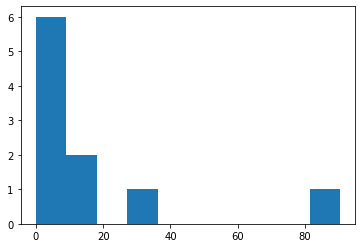

In [180]:
fig, ax = plt.subplots()
options = merged_df[merged_df['School_Type'] == 'Citywide-Option']['Graduation_Rate_School']
ax.hist(options)

In [181]:
# Raw Graduation rates for Citywide-Option Schools.
options

0      15.4
49      7.5
60      0.0
67     90.4
74      4.3
84     15.2
88      1.8
93     28.4
110     1.1
121     8.8
Name: Graduation_Rate_School, dtype: float64

> I hesitate to drop the Options category, even though it represents all of the city-wide graduation rates below 30% beside Special Education schools.

In [184]:
merged_df[(merged_df['Graduation_Rate_School'] < 30) 
          & (merged_df['School_Type']!='Citywide-Option')]

,School_ID,Short_Name,Graduation_Rate_School,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Is_High_School,Dress_Code,Classroom_Languages,Transportation_El,perc_low_income,School_Type
9,609766,VAUGHN HS,19.2,225,163,225,72,54,116,51,3,0,0,0,1,0,0,True,False,NaN,NaN,0.724444,Special Education
75,609744,NORTHSIDE LEARNING HS,0.0,216,185,216,76,44,115,44,8,2,0,0,3,0,0,True,False,American Sign Language,NaN,0.856481,Special Education


### Options Schools

The Citywide-Options are specifically designed to help re-engage students who are at risk for not graduating.  They have previously disengaged from school in some manner, and these schools are trying to reengage them. 

[Citywide-Options](https://www.cps.edu/schools/re-engagement-to-high-school/)